In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [3]:
mnist = tf.keras.datasets.mnist # 28 * 28 pixels unique image of handwritten 0-9.

(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


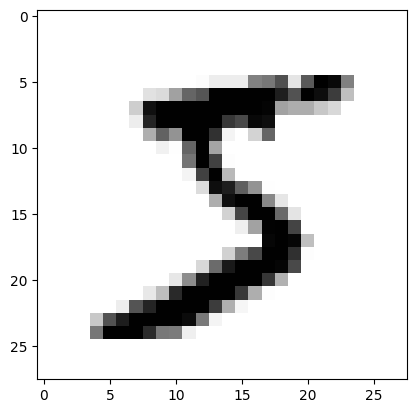

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

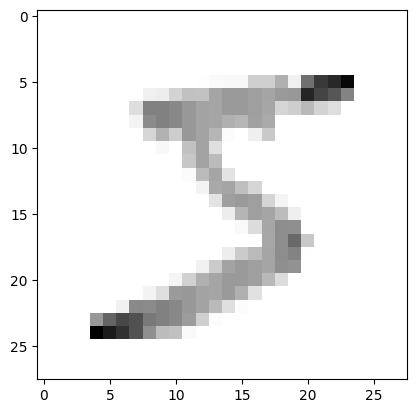

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
# print(x_train[0])

In [7]:
print(y_train[0])

5


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer.
model.add(tf.keras.layers.Dense(128, activation= tf.keras.activations.relu)) # hidden layer 1 - 128 neural network.
model.add(tf.keras.layers.Dense(128, activation= tf.keras.activations.relu)) # hidden layer 2.
model.add(tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax))
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8701 - loss: 0.4617
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9668 - loss: 0.1083
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9785 - loss: 0.0681


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print("Validation loss:", val_loss)
print("Validation accuracy", val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1112
Validation loss: 0.09543351829051971
Validation accuracy 0.9702000021934509


In [10]:
model.save("number_identify_model.h5")


In [11]:
new_model = tf.keras.models.load_model("number_identify_model.h5")

In [12]:
# compute prediction using new saved model
prediction = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
print(prediction[1])

[1.1843064e-07 1.4752890e-02 9.8493868e-01 3.0412807e-04 2.1343745e-08
 3.4919918e-07 6.7082152e-07 1.0025350e-06 2.0636585e-06 3.5380837e-11]


In [16]:
import numpy as np

print(np.argmax(prediction[1]))

2


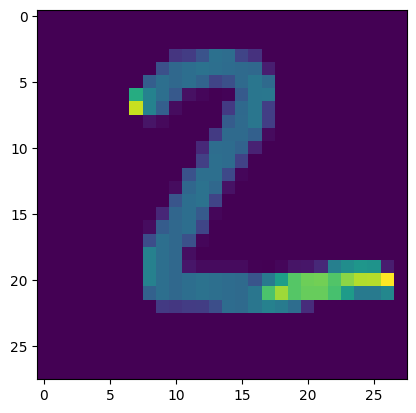

In [17]:
plt.imshow(x_test[1])
plt.show()